# 

# 

# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing dataset 

In [4]:
df=pd.read_csv("C:/Users/Pradnya/Documents/My project/card_transdata.csv")

In [5]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [7]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00
mean,26.63,5.04,1.82,0.88,0.35,0.10,0.65,0.09
std,65.39,25.84,2.80,0.32,0.48,0.30,0.48,0.28
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.88,0.30,0.48,1.00,0.00,0.00,0.00,0.00
50%,9.97,1.00,1.00,1.00,0.00,0.00,1.00,0.00
75%,25.74,3.36,2.10,1.00,1.00,0.00,1.00,0.00
max,10632.72,11851.10,267.80,1.00,1.00,1.00,1.00,1.00


# checking for missing values

In [8]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [9]:
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [10]:
categorical_val

['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']

# creating target series

In [11]:
target=df['fraud']
target

0        0.00
1        0.00
2        0.00
3        0.00
4        0.00
         ... 
999995   0.00
999996   0.00
999997   0.00
999998   0.00
999999   0.00
Name: fraud, Length: 1000000, dtype: float64

# dropping the target variable from the data set


In [12]:
df.drop('fraud',axis=1,inplace=True)
df.shape

(1000000, 7)

# converting them to numpy arrays

In [13]:
X=np.array(df)
y=np.array(target)
X.shape
y.shape

(1000000,)

# distribution of the target variable

In [14]:
len(y[y==1])
len(y[y==0])

912597

# Boxplot

In [15]:
import seaborn as sns

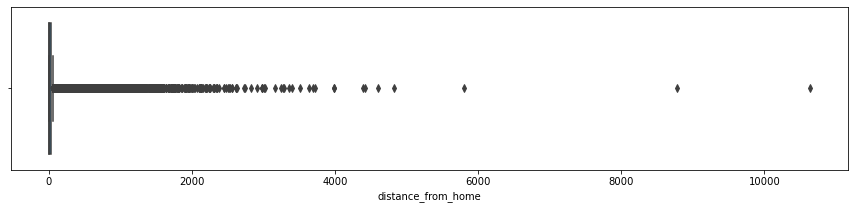

In [16]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(x='distance_from_home', data=df)
plt.show()

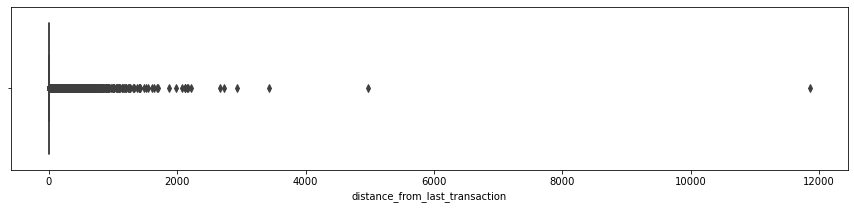

In [17]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(x='distance_from_last_transaction', data=df)
plt.show()

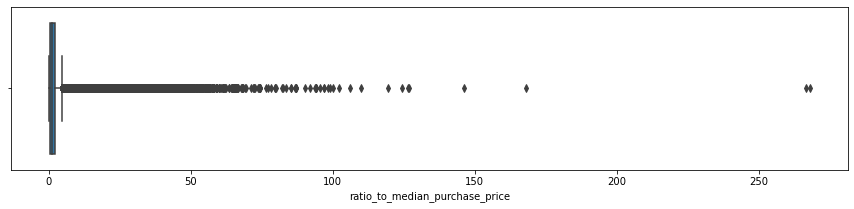

In [18]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(x='ratio_to_median_purchase_price', data=df)
plt.show()

# checking outlier values 

In [19]:
q1_distance_from_home = df.distance_from_home.quantile(.25)
q3_distance_from_home = df.distance_from_home.quantile(.75)
IQR_distance_from_home = q3_distance_from_home - q1_distance_from_home
print('IQR: ', IQR_distance_from_home)

# defining limits                                       
sup_distance_from_home = q3_distance_from_home + 1.5 * IQR_distance_from_home
inf_distance_from_home = q1_distance_from_home - 1.5 * IQR_distance_from_home
print('Upper limit: ', sup_distance_from_home)
print('Lower limit: ', inf_distance_from_home)

IQR:  21.865977063715995
Upper limit:  58.54295065212743
Lower limit:  -28.920957602736546


In [20]:
q1_distance_from_last_transaction = df.distance_from_last_transaction.quantile(.25)
q3_distance_from_last_transaction = df.distance_from_last_transaction.quantile(.75)
IQR_distance_from_last_transaction = q3_distance_from_last_transaction - q1_distance_from_last_transaction
print('IQR: ', IQR_distance_from_last_transaction)

# defining limits                                       
sup_distance_from_last_transaction = q3_distance_from_last_transaction + 1.5 * IQR_distance_from_last_transaction
inf_distance_from_last_transaction = q1_distance_from_last_transaction - 1.5 * IQR_distance_from_last_transaction
print('Upper limit: ', sup_distance_from_last_transaction)
print('Lower limit: ', inf_distance_from_last_transaction)

IQR:  3.0590770482286587
Upper limit:  7.944363262531519
Lower limit:  -4.291944930383116


In [21]:
q1_ratio_to_median_purchase_price = df.ratio_to_median_purchase_price.quantile(.25)
q3_ratio_to_median_purchase_price = df.ratio_to_median_purchase_price.quantile(.75)
IQR_ratio_to_median_purchase_price = q3_ratio_to_median_purchase_price - q1_ratio_to_median_purchase_price
print('IQR: ', IQR_ratio_to_median_purchase_price)

# defining limits                                       
sup_ratio_to_median_purchase_price = q3_ratio_to_median_purchase_price + 1.5 * IQR_ratio_to_median_purchase_price
inf_ratio_to_median_purchase_price = q1_ratio_to_median_purchase_price - 1.5 * IQR_ratio_to_median_purchase_price
print('Upper limit: ', sup_ratio_to_median_purchase_price)
print('Lower limit: ', inf_ratio_to_median_purchase_price)

IQR:  1.6206969415925334
Upper limit:  4.527415677411437
Lower limit:  -1.9553720889586974


# Correlation Heatmap

(7.5, -0.5)

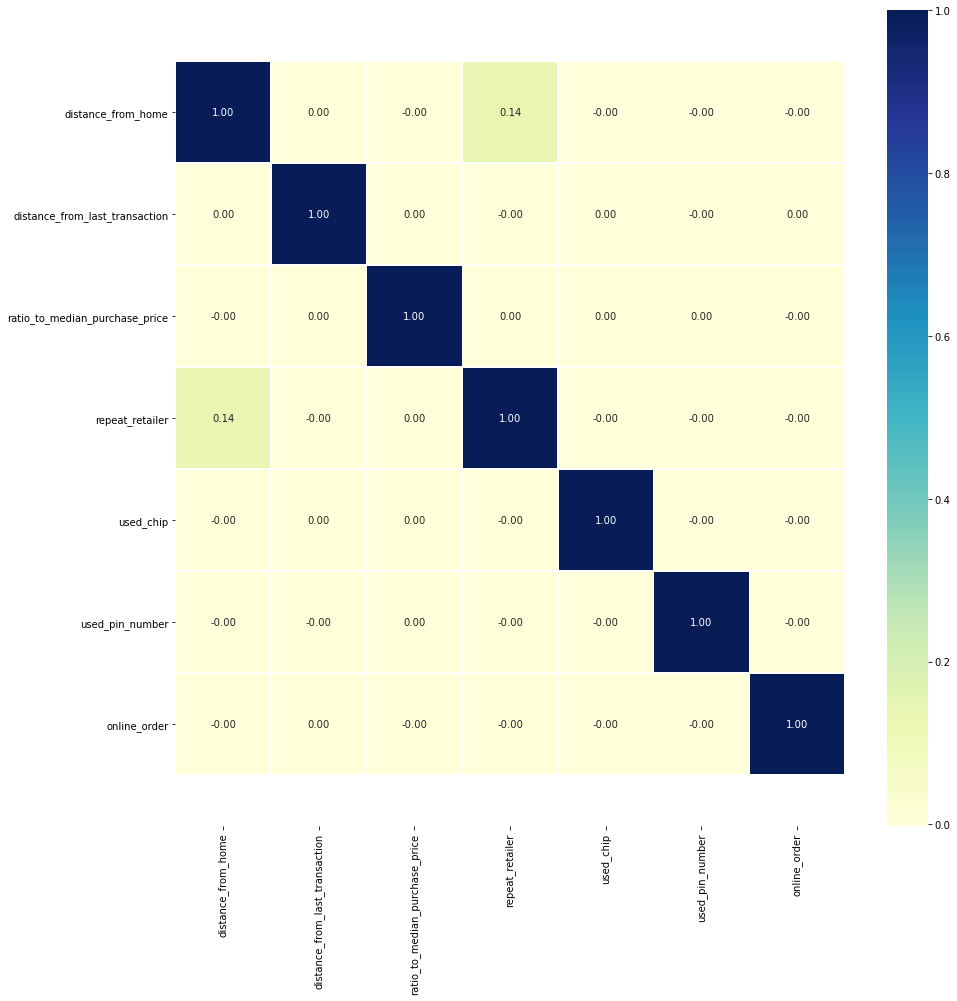

In [22]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# splitting the data set into train and test (75:25)

In [48]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [49]:
#Models Building
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [54]:
from sklearn.model_selection import train_test_split

X = df.drop('online_order', axis=1)
y = df.used_pin_number

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 

# 

# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0.0      1.0  accuracy  macro avg  weighted avg
precision      1.00     1.00      1.00       1.00          1.00
recall         1.00     1.00      1.00       1.00          1.00
f1-score       1.00     1.00      1.00       1.00          1.00
support   629494.00 70506.00      1.00  700000.00     700000.00
_______________________________________________
Confusion Matrix: 
 [[629494      0]
 [     0  70506]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0.0      1.0  accuracy  macro avg  weighted avg
precision      1.00     1.00      1.00       1.00          1.00
recall         1.00     1.00      1.00       1.00          1.00
f1-score       1.00     1.00      1.00       1.00          1.00
support   269898.00 30102.00      1.00  300000.00     300000.00
_______________________________________

In [82]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,100.00,100.00
